In [1]:
import random
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
import igraph as ig

import networkx as nx
import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import scipy.stats
import seaborn as sns
from matplotlib.font_manager import FontProperties  # 导入FontProperties
import warnings
warnings.filterwarnings("ignore")

In [2]:
fcounterpubs = pd.read_csv(r"E:\netData\MAG-nobel\2 Nobel laureates counterparts\counterparts pubs.zip" )
fcounter = pd.read_csv(r"E:\netData\MAG-nobel\2 Nobel laureates counterparts\counterparts.zip")
flau = pd.read_csv(r"E:\netData\MAG-nobel\Nobel laureates.csv")
flaupubs = pd.read_csv(r"E:\netData\MAG-nobel\Nobel Laureates pubs.zip")

In [3]:
flaupubs['If in counter'] =  flaupubs['Laureate name'].map(dict(zip(fcounter['Laureate name'].unique() , [1] * len(fcounter['Laureate name'].unique()))))

In [4]:
flaupubs.dropna(subset = 'If in counter' , inplace=True)

# Career

In [5]:
drawflaupubs = flaupubs.groupby(['Pub year']).count().iloc[1: , 0]

In [6]:
drawfcounterpubs = fcounterpubs.groupby(['paperyear']).count().iloc[1: , 0]

In [7]:
plt.rcParams['font.sans-serif'] = ['Arial']

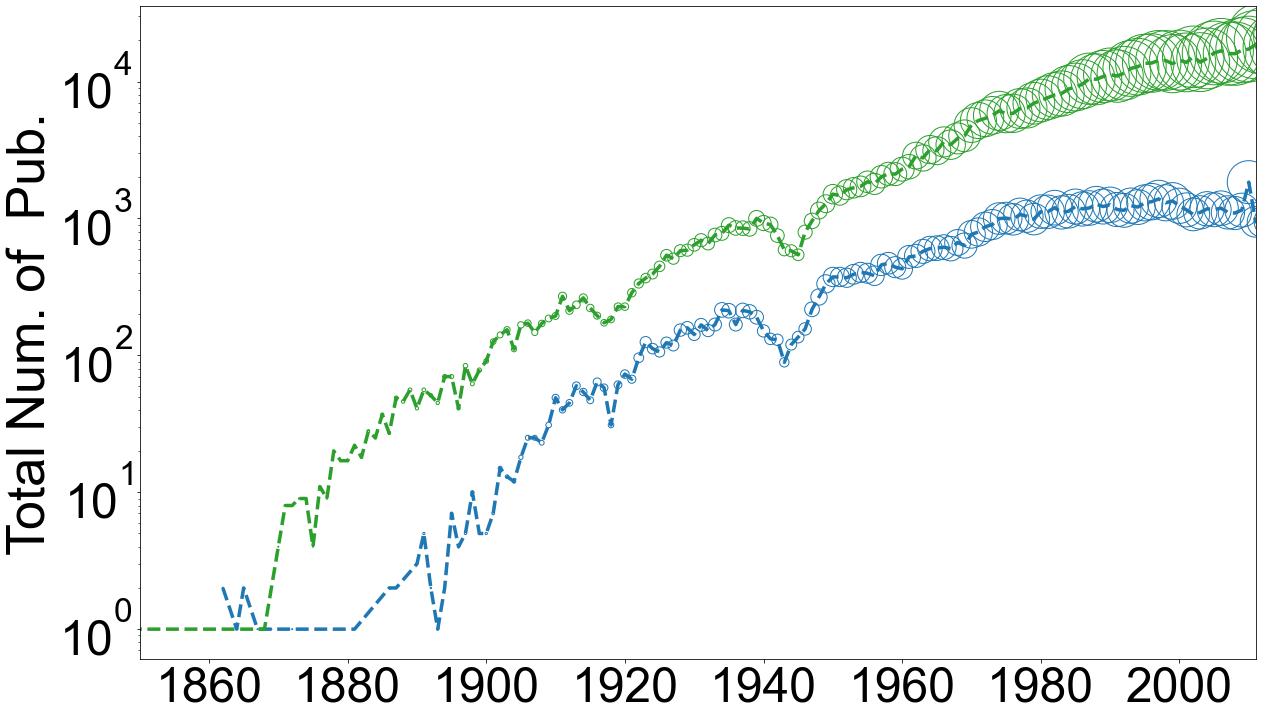

In [8]:
f, ax = plt.subplots(figsize=(20, 12))
c = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.scatter(drawflaupubs.index,drawflaupubs.values,s=drawflaupubs.values,facecolors ='none',edgecolors=c[0],alpha=1,label = 'Nobel laureates')
plt.plot(drawflaupubs.index,drawflaupubs.values,linestyle = '--', linewidth=3.5,alpha=1,color=c[0],label='')
plt.scatter(drawfcounterpubs.index,drawfcounterpubs.values,s=drawfcounterpubs.values*0.25,facecolors ='none',edgecolors=c[2],alpha=1 ,label = 'Counterpart scientists')
plt.plot(drawfcounterpubs.index,drawfcounterpubs.values,linestyle = '--', linewidth=3.5,alpha=1,color=c[2],label='')
ax.set_yscale("log")

plt.xlim(1850,2011)
plt.xticks(size = 48)
plt.yticks(size = 48)
# plt.legend(fontsize = 35)
plt.ylabel(r'Total Num. of  Pub.',fontsize = 52)
# plt.xlabel(r'Pub Year',fontsize = 52)

plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\PNAS representative evaluation\figs\fig 2\a1.pdf",bbox_inches = 'tight')

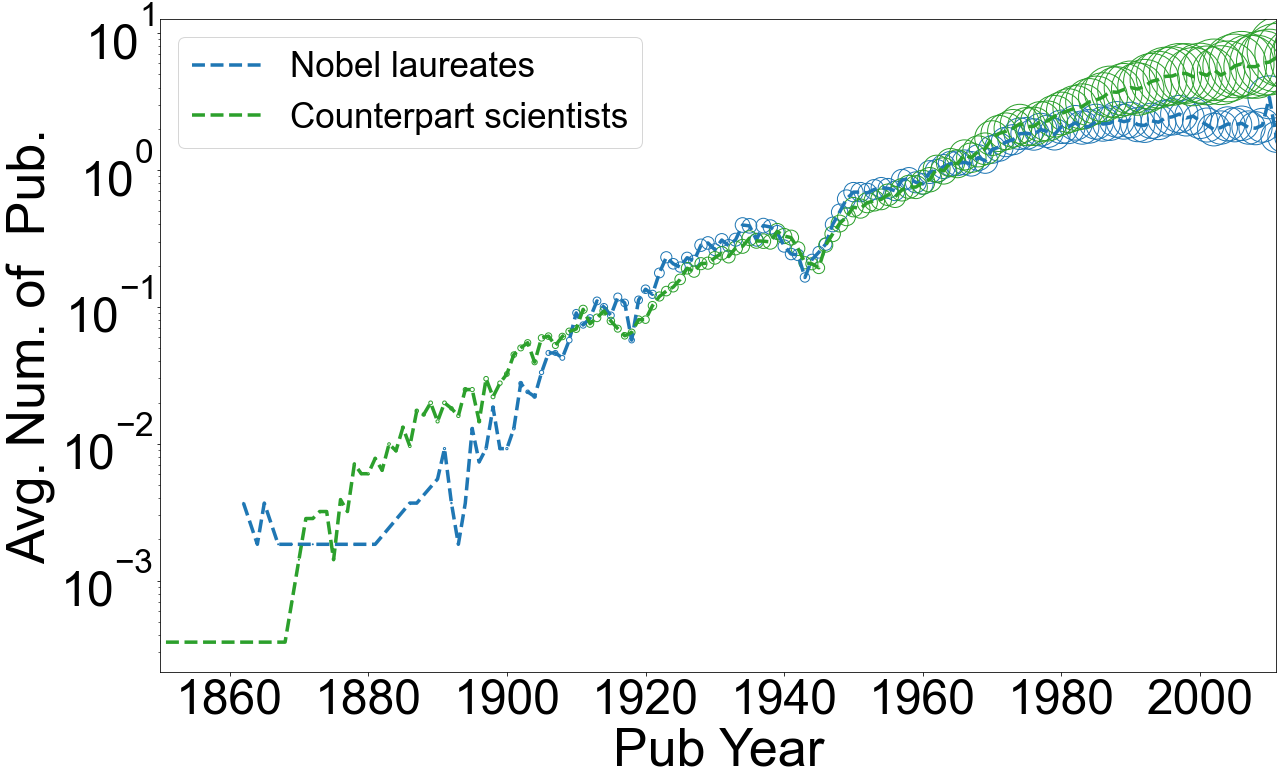

In [10]:
f, ax = plt.subplots(figsize=(20, 12))
c = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.scatter(drawflaupubs.index,drawflaupubs.values/543,s=drawflaupubs.values,facecolors ='none',edgecolors=c[0],alpha=1,label = '')
plt.plot(drawflaupubs.index,drawflaupubs.values/543,linestyle = '--', linewidth=3.5,alpha=1,color=c[0],label='Nobel laureates')
plt.scatter(drawfcounterpubs.index,drawfcounterpubs.values/2816,s=drawfcounterpubs.values*0.25,facecolors ='none',edgecolors=c[2],alpha=1 ,label = '')
plt.plot(drawfcounterpubs.index,drawfcounterpubs.values/2816,linestyle = '--', linewidth=3.5,alpha=1,color=c[2],label='Counterpart scientists')
ax.set_yscale("log")

plt.xlim(1850,2011)
plt.xticks(size = 48)
plt.yticks(size = 48)
plt.legend(fontsize = 35)
plt.ylabel(r'Avg. Num. of  Pub.',fontsize = 52)
plt.xlabel(r'Pub Year',fontsize = 52)

plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\PNAS representative evaluation\figs\fig 2\a2.png",bbox_inches = 'tight')

In [20]:
flaupubs.index = range(len(flaupubs))

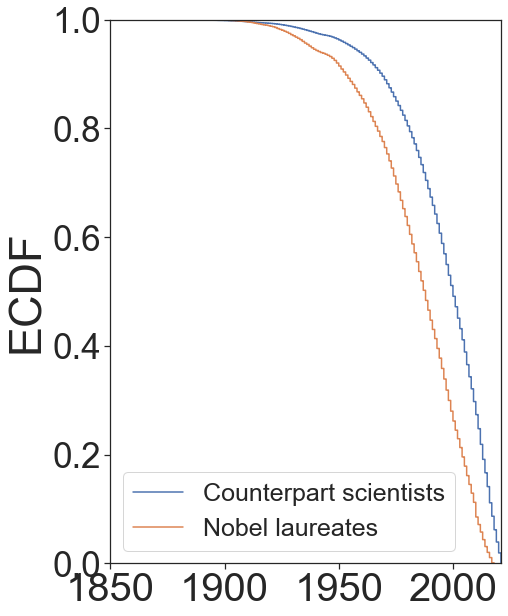

In [22]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 10))
sns.ecdfplot(data=fcounterpubs,x="paperyear", complementary=True , label = 'Counterpart scientists')
sns.ecdfplot(data=flaupubs,x="Pub year", complementary=True , label = 'Nobel laureates')
#ax.yaxis.grid(True)
plt.xlim(1850,2021)
plt.xticks([1850,1900,1950,2000] ,size = 40)
plt.yticks(size = 35)
plt.legend(fontsize = 25 )
plt.xlabel(r'')
plt.ylabel(r'ECDF',fontsize = 45)
plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\PNAS representative evaluation\figs\fig 2\a2.pdf",bbox_inches = 'tight')